In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy import stats
import matplotlib as mpl

# Set up the matplotlib parameters for a professional look
plt.rcParams.update({
    # 'font.family': 'serif',
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18
})


In [2]:

# Paths to the images.
orig_dir = rf"C:\Users\fangy\Desktop\reconstructed_rm_padded_1e-8"
recon_dir = rf"C:\Users\fangy\Desktop\all_prediction_merged_reconstructed\all_prediction_merged_reconstructed_rm_padded_1e-8_rotated"

file_list = os.listdir(orig_dir)

psnr_list = []
ssim_list = []

for i in file_list:
    if i.endswith(".npy"):
        recon_file = os.path.join(recon_dir, i)
        orig_file = os.path.join(orig_dir, i)
        # Load the images.
        orig_image = np.load(orig_file)
        recon_image = np.load(recon_file)
        # calc psnr and ssim
        recon_image = np.flip(recon_image, axis=2)

        psnr_value = psnr(orig_image, recon_image)
        ssim_value = ssim(orig_image, recon_image, data_range=orig_image.max() - orig_image.min())
        psnr_list.append(psnr_value)
        ssim_list.append(ssim_value)
        

# Calculate statistics
mean_psnr = np.mean(psnr_list)
std_psnr = np.std(psnr_list)
median_psnr = np.median(psnr_list)

mean_ssim = np.mean(ssim_list)
std_ssim = np.std(ssim_list)
median_ssim = np.median(ssim_list)

print(f"PSNR: Mean = {mean_psnr:.4f}, Median = {median_psnr:.4f}, Std = {std_psnr:.4f}")
print(f"SSIM: Mean = {mean_ssim:.4f}, Median = {median_ssim:.4f}, Std = {std_ssim:.4f}")


PSNR: Mean = 29.1228, Median = 29.5522, Std = 2.6499
SSIM: Mean = 0.9503, Median = 0.9533, Std = 0.0148


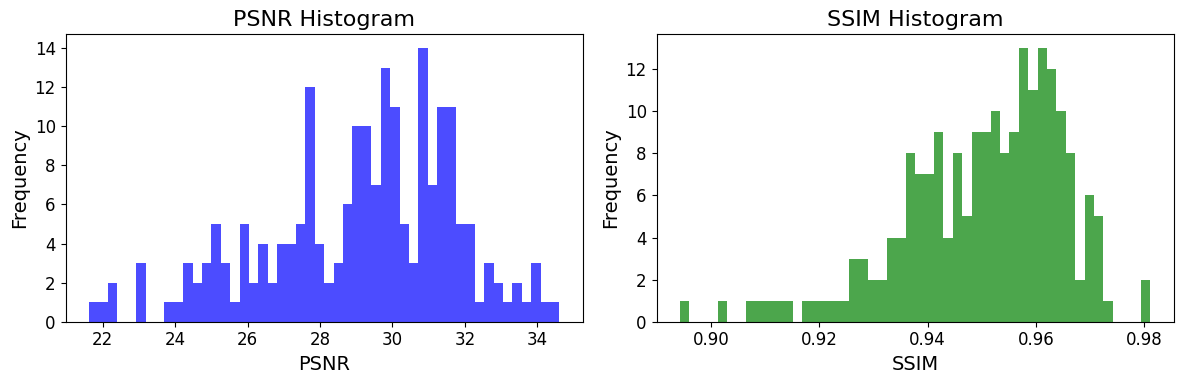

In [3]:
# plot histogram

plt.figure(figsize=(12, 4.))
plt.subplot(1, 2, 1)
plt.hist(psnr_list, bins=50, color='blue', alpha=0.7)
plt.title("PSNR Histogram")
plt.xlabel("PSNR")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(ssim_list, bins=50, color='green', alpha=0.7)
plt.title("SSIM Histogram")
plt.xlabel("SSIM")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig("paper_image/compare_reconstruction_restoration_histogram.pdf")
plt.show()


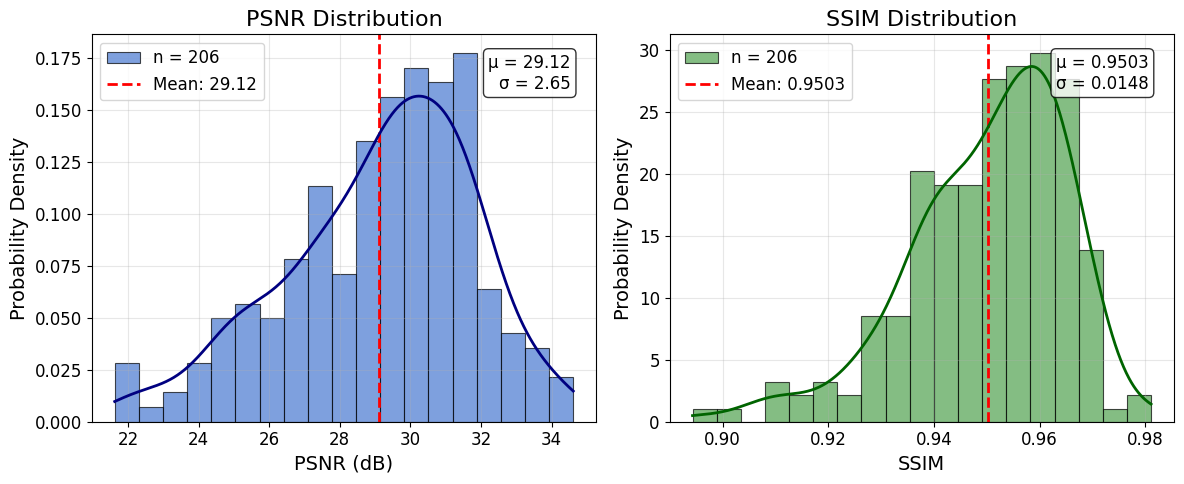

In [5]:
# Create a figure with improved aesthetics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Title removed as requested

# PSNR histogram with KDE - reduced bins
bins_psnr = np.linspace(min(psnr_list), max(psnr_list), 20)  # Reduced from 30 to 20 bins
n1, bins1, patches1 = ax1.hist(psnr_list, bins=bins_psnr, alpha=0.7, color='#4878D0', 
                              edgecolor='black', linewidth=0.8, density=True, 
                              label=f'n = {len(psnr_list)}')
ax1.axvline(mean_psnr, color='red', linestyle='dashed', linewidth=2, 
           label=f'Mean: {mean_psnr:.2f}')
# ax1.axvline(median_psnr, color='green', linestyle='dashdot', linewidth=2, 
#            label=f'Median: {median_psnr:.2f}')

# Add a KDE curve
kde_psnr = stats.gaussian_kde(psnr_list)
x_psnr = np.linspace(min(psnr_list), max(psnr_list), 1000)
ax1.plot(x_psnr, kde_psnr(x_psnr), color='navy', linewidth=2)

ax1.set_title('PSNR Distribution')
ax1.set_xlabel('PSNR (dB)')
ax1.set_ylabel('Probability Density')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# SSIM histogram with KDE - reduced bins
bins_ssim = np.linspace(min(ssim_list), max(ssim_list), 20)  # Reduced from 30 to 20 bins
n2, bins2, patches2 = ax2.hist(ssim_list, bins=bins_ssim, alpha=0.7, color='#50A14F', 
                              edgecolor='black', linewidth=0.8, density=True,
                              label=f'n = {len(ssim_list)}')
ax2.axvline(mean_ssim, color='red', linestyle='dashed', linewidth=2, 
           label=f'Mean: {mean_ssim:.4f}')
# ax2.axvline(median_ssim, color='green', linestyle='dashdot', linewidth=2, 
#            label=f'Median: {median_ssim:.4f}')

# Add a KDE curve
kde_ssim = stats.gaussian_kde(ssim_list)
x_ssim = np.linspace(min(ssim_list), max(ssim_list), 1000)
ax2.plot(x_ssim, kde_ssim(x_ssim), color='darkgreen', linewidth=2)

ax2.set_title('SSIM Distribution')
ax2.set_xlabel('SSIM')
ax2.set_ylabel('Probability Density')
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

# Add statistical information as text
stats_text_psnr = f"μ = {mean_psnr:.2f}\nσ = {std_psnr:.2f}"
stats_text_ssim = f"μ = {mean_ssim:.4f}\nσ = {std_ssim:.4f}"

# Position the text in the upper right corner
ax1.text(0.95, 0.95, stats_text_psnr,
         verticalalignment='top', horizontalalignment='right',
         transform=ax1.transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax2.text(0.95, 0.95, stats_text_ssim,
         verticalalignment='top', horizontalalignment='right',
         transform=ax2.transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()  # Adjusted since there's no title
plt.savefig("paper_image/quality_metrics_distribution.pdf", dpi=300, bbox_inches='tight')
plt.savefig("paper_image/quality_metrics_distribution.png", dpi=300, bbox_inches='tight')
plt.show()